In [1]:
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Flatten

C:\Users\ho.asadio\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def unpickle(file):
    
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
def load_cifar10(path):
    data_images= []
    labels = []
    
    for i in range(1, 6):
        batch = unpickle(path + f'data_batch_{i}')
        data_images.append(batch[b'data'])
        labels.extend(batch[b'labels'])
        
    test_batch = unpickle(path + 'test_batch')
    test_images = test_batch[b'data']
    test_labels = test_batch[b'labels']
        
    return data_images, np.array(labels),  test_images, np.array(test_labels)

In [4]:
cif_path = "C:/Users/ho.asadio/Desktop/deep_learning/cifar-10-python/cifar-10-batches-py/"

In [5]:
data_images, labels, test_images, test_labels = load_cifar10(cif_path)        

In [6]:
data_images = np.vstack(data_images)

#### Filtrer les images des animaux 

In [7]:
animal_classes = [2,3,4,5,6,7]

In [8]:
# Filtrage des données
train_animal_images =[image for image, label in zip(data_images, labels) if label in animal_classes]
train_animal_labels = [label for label in labels if label in animal_classes]

In [9]:
#conversion en tableaux numpy
train_animal_images = np.array(train_animal_images)
train_animal_labels = np.array(train_animal_labels)

In [10]:
# Filtrage des données
test_animal_images =[image for image, label in zip(test_images, test_labels) if label in animal_classes]
test_animal_labels = [label for label in test_labels if label in animal_classes]

In [11]:
test_animal_images = np.array(test_animal_images)
test_animal_labels = np.array(test_animal_labels)

#### Définir les variables d'entrainement et de validation

In [40]:
X_train = train_animal_images
y_train = train_animal_labels

In [41]:
X_test = test_animal_images
y_test = test_animal_labels

In [42]:
X_train = train_animal_images / 255.0
X_test = test_animal_images / 255.0

In [43]:
num_classes= 6

In [44]:
y_train_encoded = tf.one_hot(y_train, num_classes)
y_test_encoded =  tf.one_hot(y_test, num_classes)

##### initialiser le modèle et ajouter les couches 

In [17]:
model = Sequential()
model.add(Dense(3000, activation='relu', input_shape = (3072,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation ='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 128)               384128    
                                                                 
 dense_2 (Dense)             (None, 6)                 774       
                                                                 
Total params: 9,603,902
Trainable params: 9,603,902
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
# fit the keras model on the dataset
history= model.fit(X_train, y_train_encoded, epochs =10, batch_size=64, validation_data = (X_test, y_test_encoded))

Epoch 1/10
469/469 [==============================] - 84s 175ms/step - loss: 634.5349 - accuracy: 0.1671 - val_loss: 2620.5916 - val_accuracy: 0.1667
Epoch 2/10
469/469 [==============================] - 82s 174ms/step - loss: 5997.9761 - accuracy: 0.1691 - val_loss: 7662.6655 - val_accuracy: 0.1667
Epoch 3/10
469/469 [==============================] - 80s 171ms/step - loss: 15922.6221 - accuracy: 0.1681 - val_loss: 14874.4668 - val_accuracy: 0.1667
Epoch 4/10
469/469 [==============================] - 86s 182ms/step - loss: 41240.5664 - accuracy: 0.1666 - val_loss: 74473.5234 - val_accuracy: 0.1667
Epoch 5/10
469/469 [==============================] - 87s 185ms/step - loss: 59428.1953 - accuracy: 0.1639 - val_loss: 114806.8359 - val_accuracy: 0.1667
Epoch 6/10
469/469 [==============================] - 88s 188ms/step - loss: 89124.1953 - accuracy: 0.1669 - val_loss: 79997.1016 - val_accuracy: 0.1667
Epoch 7/10
469/469 [==============================] - 86s 184ms/step - loss: 119730.92

Text(0, 0.5, 'Loss')

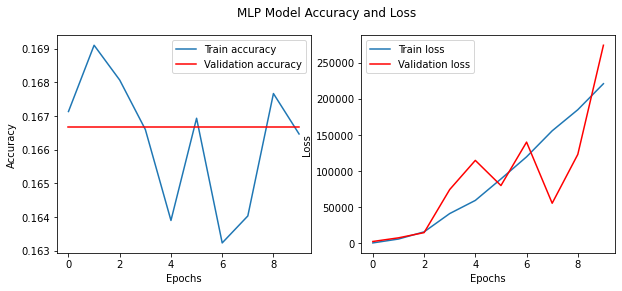

In [21]:
## Visualisation des performances 

import seaborn as sns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle("MLP Model Accuracy and Loss")

sns.lineplot(x=history.epoch, y= history.history['accuracy'], label= "Train accuracy", ax=ax1)
sns.lineplot(x=history.epoch, y= history.history['val_accuracy'], label= "Validation accuracy", ax=ax1, color="red")

ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")


#########################

sns.lineplot(x=history.epoch, y= history.history['loss'], label= "Train loss", ax=ax2)
sns.lineplot(x=history.epoch, y= history.history['val_loss'], label= "Validation loss", ax=ax2, color="red")

ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")


#### Ajout la couche de normalisation

In [22]:
model1 = Sequential()

model1.add(Dense(3000, activation='relu', input_shape = (3072,)))
model1.add(BatchNormalization())
model1.add(Dense(128, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(6, activation ='softmax'))

In [23]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3000)              9219000   
                                                                 
 batch_normalization (BatchN  (None, 3000)             12000     
 ormalization)                                                   
                                                                 
 dense_4 (Dense)             (None, 128)               384128    
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 6)                 774       
                                                                 
Total params: 9,616,414
Trainable params: 9,610,158
No

In [24]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
# fit the keras model on the dataset
history1= model1.fit(X_train, y_train_encoded, epochs =10, batch_size=64, validation_data= (X_test, y_test_encoded))

Epoch 1/10
469/469 [==============================] - 78s 162ms/step - loss: 0.9345 - accuracy: 0.2755 - val_loss: 1.1579 - val_accuracy: 0.2112
Epoch 2/10
469/469 [==============================] - 76s 163ms/step - loss: 0.8932 - accuracy: 0.2742 - val_loss: 1.0985 - val_accuracy: 0.2067
Epoch 3/10
469/469 [==============================] - 78s 166ms/step - loss: 0.8859 - accuracy: 0.2761 - val_loss: 1.3535 - val_accuracy: 0.1697
Epoch 4/10
469/469 [==============================] - 82s 174ms/step - loss: 0.8773 - accuracy: 0.2787 - val_loss: 0.8917 - val_accuracy: 0.2563
Epoch 5/10
469/469 [==============================] - 82s 176ms/step - loss: 0.8794 - accuracy: 0.2848 - val_loss: 0.9725 - val_accuracy: 0.2570
Epoch 6/10
469/469 [==============================] - 82s 175ms/step - loss: 0.8769 - accuracy: 0.2836 - val_loss: 1.2155 - val_accuracy: 0.2193
Epoch 7/10
469/469 [==============================] - 83s 176ms/step - loss: 0.8759 - accuracy: 0.2832 - val_loss: 0.9065 - val_ac

Text(0, 0.5, 'Loss')

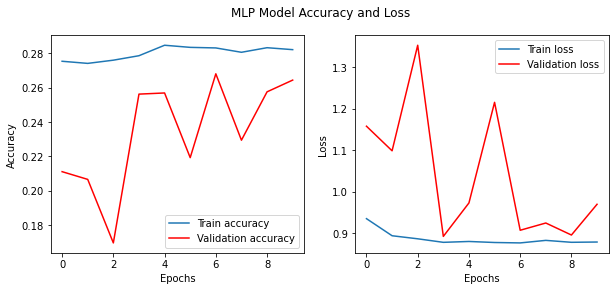

In [32]:
## Visualisation des performances 

import seaborn as sns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle("MLP Model Accuracy and Loss")

sns.lineplot(x=history1.epoch, y= history1.history['accuracy'], label= "Train accuracy", ax=ax1)
sns.lineplot(x=history1.epoch, y= history1.history['val_accuracy'], label= "Validation accuracy", ax=ax1, color="red")

ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")


#################################

sns.lineplot(x=history1.epoch, y= history1.history['loss'], label= "Train loss", ax=ax2)
sns.lineplot(x=history1.epoch, y= history1.history['val_loss'], label= "Validation loss", ax=ax2, color="red")

ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")


####  MLP avec  batch normalization et Dropout

In [27]:
model2 = Sequential()

model2.add(Dense(3000, activation='relu', input_shape = (3072,)))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(128, activation='relu'))

model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(6, activation ='softmax'))


In [28]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 3000)              9219000   
                                                                 
 batch_normalization_2 (Batc  (None, 3000)             12000     
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 3000)              0         
                                                                 
 dense_7 (Dense)             (None, 128)               384128    
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)              

In [29]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
# fit the keras model on the dataset
history2= model2.fit(X_train, y_train_encoded, epochs =10, batch_size=64, validation_data=(X_test,y_test_encoded))

Epoch 1/10
469/469 [==============================] - 79s 166ms/step - loss: 1.1517 - accuracy: 0.2374 - val_loss: 0.9146 - val_accuracy: 0.2882
Epoch 2/10
469/469 [==============================] - 79s 168ms/step - loss: 1.0069 - accuracy: 0.2245 - val_loss: 0.9356 - val_accuracy: 0.2398
Epoch 3/10
469/469 [==============================] - 80s 170ms/step - loss: 1.0299 - accuracy: 0.1982 - val_loss: 0.9579 - val_accuracy: 0.1873
Epoch 4/10
469/469 [==============================] - 85s 180ms/step - loss: 1.0440 - accuracy: 0.1889 - val_loss: 0.9574 - val_accuracy: 0.1772
Epoch 5/10
469/469 [==============================] - 84s 179ms/step - loss: 1.0476 - accuracy: 0.1808 - val_loss: 1.0083 - val_accuracy: 0.1868
Epoch 6/10
469/469 [==============================] - 81s 173ms/step - loss: 1.0425 - accuracy: 0.1798 - val_loss: 1.0214 - val_accuracy: 0.1747
Epoch 7/10
469/469 [==============================] - 81s 173ms/step - loss: 1.0365 - accuracy: 0.1823 - val_loss: 1.0170 - val_ac

Text(0, 0.5, 'Loss')

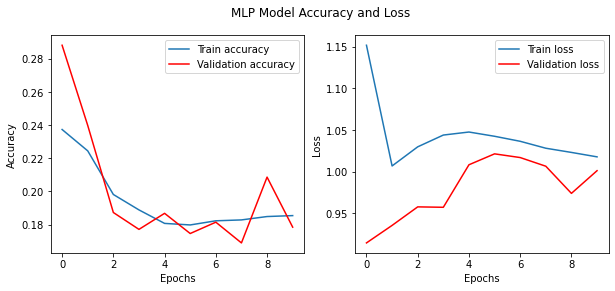

In [33]:
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle("MLP Model Accuracy and Loss")

sns.lineplot(x=history2.epoch, y= history2.history['accuracy'], label= "Train accuracy", ax=ax1)
sns.lineplot(x=history2.epoch, y= history2.history['val_accuracy'], label= "Validation accuracy", ax=ax1, color="red")

ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")


#########################

sns.lineplot(x=history2.epoch, y= history2.history['loss'], label= "Train loss", ax=ax2)
sns.lineplot(x=history2.epoch, y= history2.history['val_loss'], label= "Validation loss", ax=ax2, color="red")

ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")



In [45]:
score = model2.evaluate(X_test, y_test_encoded)

188/188 [==============================] - 5s 28ms/step - loss: 1.0013 - accuracy: 0.1785


In [46]:
pred = model2.predict(X_test)

188/188 [==============================] - 5s 26ms/step


In [47]:
pred[0]

array([0.06661169, 0.06886894, 0.20749567, 0.24356623, 0.14336008,
       0.27009735], dtype=float32)

In [48]:
pred_classes = np.argmax(pred, axis = 1)
pred_classes

array([5, 5, 2, ..., 2, 5, 2], dtype=int64)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, pred_classes))

              precision    recall  f1-score   support

           2       0.14      0.56      0.22      1000
           3       0.50      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.26      0.51      0.35      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000

    accuracy                           0.18      6000
   macro avg       0.15      0.18      0.09      6000
weighted avg       0.15      0.18      0.09      6000



C:\Users\ho.asadio\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ho.asadio\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ho.asadio\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


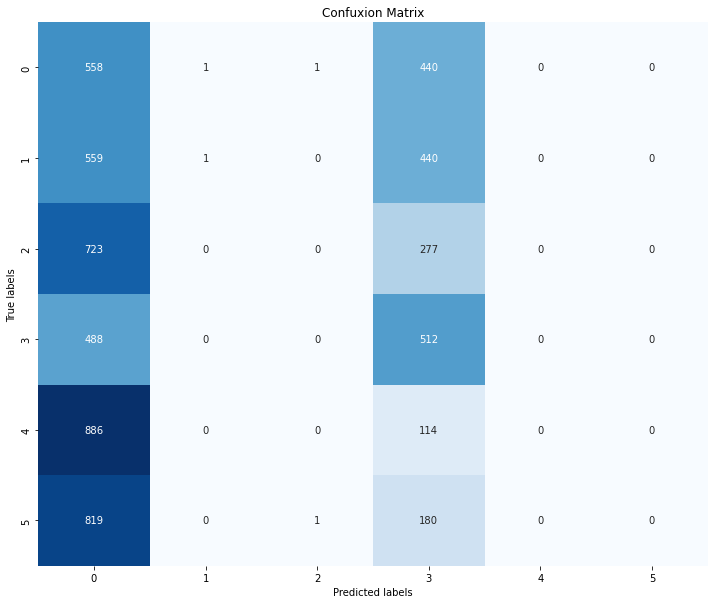

In [50]:
import seaborn as sns
cm = confusion_matrix(y_test, pred_classes)

fig, ax = plt.subplots(figsize =(12,10))

sns.heatmap(cm, annot= True,fmt ='d', cmap='Blues', cbar= False, ax =ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confuxion Matrix')

plt.show()

Le modèle de MLP sur les images des animaux donne des accuracy très faibles et des valeurs de loss qui augmentent progressivement.
Le modèle ne travaille pas . Cependant, lorsqu'on ajoute des couches de normalisation, de dropout, le modèle commence à apprendre mais très
faiblement. Ces  deux évenements nous permettent de conclure que le modèle de perceptron multicouches semblent ne pas pouvoir
traiter les données d'images donc pas adapté. 